In [2]:
import json

with open("../dataset/images_flat_2.json", "r") as dataset:
    data = json.load(dataset)
    
imgs_as_lists = [movie["image"] for movie in data]
genres = [movie["genre"] for movie in data]

In [2]:
!pip show projetannuel

Name: ProjetAnnuel
Version: 0.1.0
Summary: 
Home-page: 
Author: 
Author-email: 
License: 
Location: c:\users\leopo\documents\esgi\3rd_year\projetannuel\pavenv\lib\site-packages
Requires: 
Required-by: 


In [3]:
import projetannuel

y = projetannuel.string_labels(genres)

model = projetannuel.LinearModel(
    imgs_as_lists,
    y
)

In [ ]:
model.train_classification(epochs=10000, learning_rate=0.001)

Ici ça passe


In [ ]:
y_pred = []
for img in imgs_as_lists:
    y_pred.append(model.predict(img))

In [ ]:
print(y_pred)

['Animation', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Animat

In [ ]:
projetannuel.accuracy_score(genres, y_pred)

0.5716666666666667

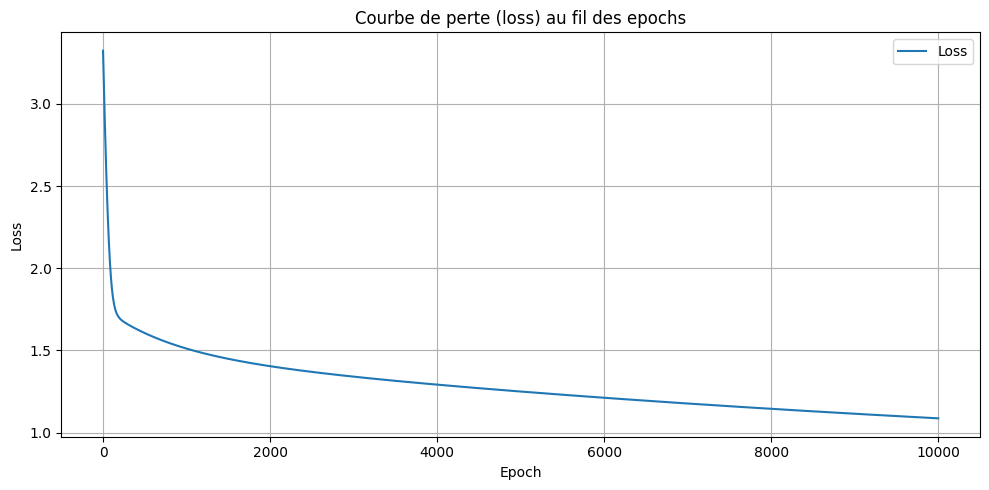

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## MLP

In [3]:
genres_binary = [[0] if x=="Animation" else [1] for x in genres]
len(genres_binary)

1200

In [4]:
import projetannuel as pa
model = pa.MLP([1200, 256,128,64, 1])
model.train(imgs_as_lists,genres_binary,2000,0.01,True)
y_pred = [model.predict(x,True)[0] for x in imgs_as_lists]

Epoch 0 – BCE: 18.420681
Epoch 100 – BCE: 0.001151
Epoch 200 – BCE: 10.489359
Epoch 300 – BCE: 0.000389
Epoch 400 – BCE: 0.000000
Epoch 500 – BCE: 0.192022
Epoch 600 – BCE: 18.420681
Epoch 700 – BCE: 0.000000
Epoch 800 – BCE: 11.397297
Epoch 900 – BCE: 0.000000
Epoch 1000 – BCE: 0.004807
Epoch 1100 – BCE: 0.000146
Epoch 1200 – BCE: 8.229782
Epoch 1300 – BCE: 0.000009
Epoch 1400 – BCE: 11.613255
Epoch 1500 – BCE: 11.218486
Epoch 1600 – BCE: 0.000055
Epoch 1700 – BCE: 0.000000
Epoch 1800 – BCE: 13.664240
Epoch 1900 – BCE: 0.000000


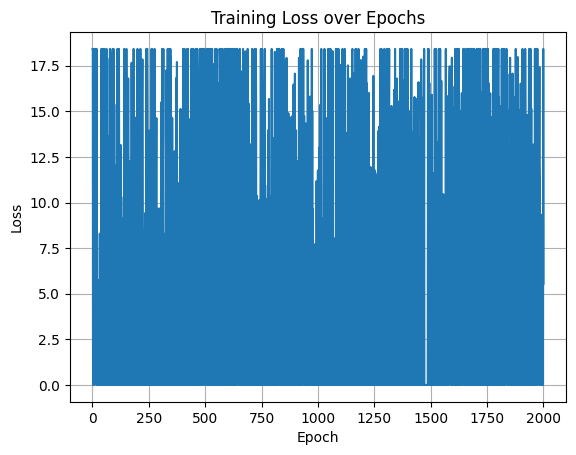

In [5]:
import matplotlib.pyplot as plt

loss = model.loss  
epochs = list(range(1, len(loss) + 1))

plt.plot(epochs, loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()


In [6]:
genres_binary_2 = [x[0] for x in genres_binary]

In [7]:
print(y_pred)

[0.9999483860083531, 0.9999999642378522, 0.9999999734961632, 0.9999995669817671, 0.6714728912009812, 0.999999999369405, 0.999999919952978, 0.9999197952864473, 0.9999999871718562, 0.9999998919221997, 0.9997338536815038, 0.9999517337921031, 0.999999997550308, 0.999784164467751, 0.897323402145829, 0.9999999668850117, 0.5350026984011867, 0.9880281959459813, 0.9947806263896354, 0.9998413695435687, 0.9999997161772087, 0.9999999984876734, -0.22087360901811587, 0.9993500148535842, 0.9999653264307766, 0.9999821271326639, 0.9998448360810386, 0.9999999728569473, 0.9970896232169433, 0.9999999115588875, 0.9999999999834884, 0.99998419049488, 0.9999995939065343, 0.9905335922562813, 0.9999997677537075, 0.9988570414583048, 0.9999987138283952, 0.9999835902639796, 0.9999969287732376, 0.9994035435574935, 0.9999998071432468, 0.9999631586555343, 0.999998014964426, 0.9999990352433951, 0.999999803628531, 0.999995386200358, 0.9905114694461549, 0.9999999997313072, 0.945057308613333, 0.9999322679677802, 0.999999

In [8]:
y_pred = [0 if x<0.5 else 1 for x in y_pred]
y_pred.count(1)

1173

In [9]:
pa.accuracy_score(genres_binary_2, y_pred)

0.5108333333333334